
<img src="https://minas.medellin.unal.edu.co/eventos/latwaves2018/images/logo_unal.png" alt="unal logo" width="500"/>

#Universidad Nacional de Colombia
###$\color{gray}{\textit{Deep learning: Prediccion Valores del Indice S&P500}}$

  

  Presentado por:
####$\textit{Jorge Steban Moreno Lozano}$ [jorgestebanmorenolozano@gmail.com]()
####$\textit{Julian Mauricio Rodriguez Barreto}$ [jumrodriguezba@unal.edu.co]()

---

[Video Youtube](https://youtu.be/bfZ0Ka81vLU)



---



# Librerias

In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# **Entendimiento del Negocio y Carga de Datos**
---

## **1. Marco de Proyecto**
---

### **1.1. Trasfondo del Negocio**
---

- ¿Quién es el cliente o los beneficiarios del proyecto? ¿En qué dominio se encuentran?

**R:** El proyecto se trata de una creación de una red neuronal para predecir los datos históricos del índice S&P 500 tiene como beneficiarios principales a los fondos de inversión, gestores de cartera, inversionistas individuales, analistas financieros y consultores. Estos actores operan en el dominio financiero y de inversión, donde la precisión en la predicción de los movimientos del mercado es crucial. La herramienta propuesta busca mejorar la toma de decisiones en la compra y venta de acciones del S&P 500, proporcionando predicciones más certeras sobre si el valor del índice subirá, bajará o se mantendrá en un día específico.

- ¿Qué problemas del negocio o del dominio estamos tratando de solucionar?

**R**En el dominio financiero, el proyecto busca resolver varios problemas críticos. En primer lugar, busca mejorar la precisión de las predicciones del mercado, permitiendo a los inversores anticipar con mayor certeza los movimientos del S&P 500. Esto ayudaría a optimizar las estrategias de inversión, permitiendo a los inversores ajustar sus carteras de manera más efectiva para maximizar rendimientos y minimizar riesgos. Además, el proyecto busca reducir la incertidumbre en el mercado, proporcionando una mayor claridad sobre las posibles tendencias del S&P 500 y ayudando a los inversores a tomar decisiones más informadas y fundamentadas.

### **1.2. Alcance**
---

- ¿Qué  solución basada en _Deep Learning_ queremos implementar?

**R:** La solución que se desea implementar es por medio de una red neuronal recurrente, diseñada para analizar series temporales de datos del índice S&P 500. Esta red neuronal será entrenada utilizando datos históricos del S&P 500 para aprender patrones y comportamientos en las fluctuaciones del mercado a lo largo del tiempo para predecir el ultimo valor  del índice en un dia especifico y que esto pueda usarse como herramiento para generar sugerencias de inversión basadas en el análisis de las tendencias y patrones identificados en los datos históricos.

- ¿Qué  se hará?

**R:** Para lograr esto, la red recurrente analizará secuencias de datos pasadas del S&P 500 y aprenderá a identificar patrones que preceden a ciertos movimientos en el mercado, como períodos de aumento, disminución o estabilidad. Luego, utilizará estos patrones aprendidos para generar un valor aproximado del indice en el dia siguiente. Esto permitirá a inversores identificar cuando comprar, vender o mantener acciones del S&P 500 en función de las tendencias identificadas en los datos históricos.

- ¿De qué forma el cliente o beneficiario utilizará el producto del proyecto?

**R:** El cliente o beneficiario utilizará el producto del proyecto como una herramienta de apoyo para la toma de decisiones de inversión. La salida de la red neuronal recurrente proporcionará valores futuros del indice para que pueda usarse como ayuda en la inversión basadas en el análisis de series temporales del S&P 500. Estos valores servirán como guía para los inversores, quienes podrán considerarlas junto con otros factores y análisis para tomar decisiones informadas sobre sus estrategias de inversión en el mercado de valores. La herramienta ayudará a los clientes a aprovechar los conocimientos extraídos de los datos históricos para mejorar sus decisiones de inversión y gestionar mejor sus carteras en función de las tendencias identificadas en el mercado.

### **1.3. Plan**
---


* **Semana del 28 de marzo al 4 de abril:**

Recopilación de datos de la plataforma Kaggle - **1 dia**

Exploración inicial de los datos - **2 dias**

Preparación del entorno de desarrollo y configuración de herramientas - **1 dia**

Investigación sobre técnicas de deep learnig para analisis financiero - **1 dia**

* **Semana del 4 de abril al 11 de abril:**

Selección y extracción de los datos relacionados con el índice S&P 500 - **2 dias**

Procesamiento de datos, normalización dela informacion, depuración de caracteristicas redundantes,asignacion de las etiquetas - **2 dias**

Entrenamiento inicial del modelo - **3 dias**

* **Semana del 6 de marzo al 12 de marzo:**

Evaluación y ajuste de hiperparametros del modelo - **6 dias**

* **Semana del 13 de marzo al 17 de marzo:**

Analisis de los resultados obtenidos y contraste con informacion real del mercado -**4 dias**

## **2. Datos**
---


### **2.1. Origen**
---




*   ¿De dónde vienen los datos?

**R:** Los datos históricos del comportamiento del índice S&P 500 fueron recopilados a través de los conjuntos de datos disponibles en la plataforma Investing, específicamente utilizando la sección de "Datos históricos del S&P 500". Este conjunto de datos ofrece una visión detallada y exhaustiva del rendimiento del índice, proporcionando información crucial como el valor del índice en diferentes períodos de tiempo, así como los valores de apertura y cierre en el mercado financiero.

* ¿Se usa alguna herramienta o proceso para la descarga de la información?

**R:**El conjunto de datos históricos del comportamiento del índice S&P500 (Datos históricos del S&P 500) se descargaron y se cargaron en Google Drive para poder acceder a ellos de manera abierta y directa.

* ¿Qué tipo de datos estamos manejando?

**R:**Los datos que estamos manejando son principalmente datos financieros relacionados con el comportamiento del índice S&P 500 en diferentes puntos temporales. Estos datos incluyen una serie de columnas que proporcionan información específica sobre el rendimiento del índice en el mercado financiero. Aquí hay una descripción de las columnas que componen el conjunto de datos:

1. Fecha: Esta columna indica la fecha en la que se registraron los datos o el período de tiempo al que se refieren las observaciones.

2. Último: Representa el valor del índice S&P 500 al cierre del período de tiempo especificado. Este valor refleja el precio del índice al final del día de negociación.

3. Apertura: Indica el valor del índice S&P 500 al comienzo del período de tiempo especificado. Es el precio con el que se inicia la sesión de negociación.

4. Máximo: Refleja el valor más alto alcanzado por el índice S&P 500 durante el período de tiempo determinado. Representa el punto máximo de la cotización durante el día de negociación.

5. Mínimo: Indica el valor más bajo alcanzado por el índice S&P 500 durante el período de tiempo especificado. Representa el punto más bajo de la cotización durante el día de negociación.

6. Vol.: Esta columna puede representar el volumen de negociación, es decir, la cantidad total de acciones del índice S&P 500 que se intercambiaron durante el período de tiempo determinado. La unidad de medida puede variar según el contexto.

7. % var.: Indica la variación porcentual del valor del índice S&P 500 en comparación con un período de referencia, como el día anterior o el período de apertura. Representa el cambio porcentual en el precio del índice durante el período de tiempo especificado.

### **2.2. Carga o Adquisición de Datos**
---

Agregue el código necesario en _Python_ para obtener o cargar los datos.

In [ ]:
!wget 'https://drive.google.com/uc?export=view&id=1QvQewt31IAGzqxgutnzyVjcr9E7p5UPC' -O Datos_historicos_SP500.csv
df_sp500 = pd.read_csv('/content/Datos_historicos_SP500.csv', on_bad_lines='skip')
df_sp500['Fecha'] = pd.to_datetime(df_sp500['Fecha'], format='%d.%m.%Y')
df_sp500['Último']=df_sp500['Último'].str.replace('.', '').str.replace(',', '.').astype(float)
df_sp500['Apertura']=df_sp500['Apertura'].str.replace('.', '').str.replace(',', '.').astype(float)
df_sp500

--2024-04-05 01:47:44--  https://drive.google.com/uc?export=view&id=1QvQewt31IAGzqxgutnzyVjcr9E7p5UPC
Resolving drive.google.com (drive.google.com)... 142.251.2.102, 142.251.2.100, 142.251.2.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1QvQewt31IAGzqxgutnzyVjcr9E7p5UPC&export=view [following]
--2024-04-05 01:47:45--  https://drive.usercontent.google.com/download?id=1QvQewt31IAGzqxgutnzyVjcr9E7p5UPC&export=view
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330482 (323K) [application/octet-stream]
Saving to: ‘Datos_historicos_SP500.csv’

Datos_historicos_SP 100%[===================>] 322.74K  --.-KB/s    in 

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,2014-02-10,1799.84,1796.20,"1.799,94","1.791,83",NaN,"0,16%"
1,2014-02-07,1797.02,1776.01,"1.798,03","1.776,01",NaN,"1,33%"
2,2014-02-06,1773.43,1752.99,"1.774,06","1.752,99",NaN,"1,24%"
3,2014-02-05,1751.64,1753.38,"1.755,79","1.737,92",NaN,"-0,20%"
4,2014-02-04,1755.20,1743.82,"1.758,73","1.743,82",NaN,"0,76%"
...,...,...,...,...,...,...,...
4995,1994-04-08,447.10,450.90,"450,90","445,50",NaN,"-0,84%"
4996,1994-04-07,450.90,448.10,"451,10","446,40",NaN,"0,62%"
4997,1994-04-06,448.10,448.30,"449,60","445,00",NaN,"-0,04%"
4998,1994-04-05,448.30,439.10,"448,30","438,90",NaN,"2,14%"


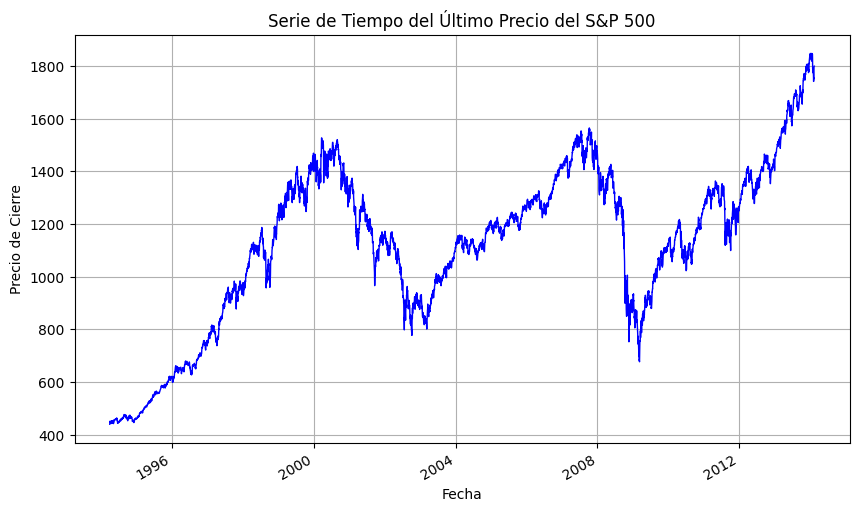

In [ ]:
df_sp500.set_index('Fecha', inplace=True)
serie_tiempo = df_sp500['Último'].astype(float)
plt.figure(figsize=(10, 6))
serie_tiempo.plot(color='blue', linewidth=1)
plt.title('Serie de Tiempo del Último Precio del S&P 500')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.grid(True)
plt.show()

# **Entendimiento y Preparación de los Datos**
---



## **1. Análisis Exploratorio de los Datos**
---



### **1.1. Resumen General**
---


**¿Cuántos documentos tiene el dataset?**

Se cuenta con 5 mil registros historicos del comportamiento del S&P 500.

In [ ]:
!wget 'https://drive.google.com/uc?export=view&id=1QvQewt31IAGzqxgutnzyVjcr9E7p5UPC' -O Datos_historicos_SP500.csv
df_sp500 = pd.read_csv('/content/Datos_historicos_SP500.csv', on_bad_lines='skip')
df_sp500

--2024-04-27 16:02:21--  https://drive.google.com/uc?export=view&id=1QvQewt31IAGzqxgutnzyVjcr9E7p5UPC
Resolving drive.google.com (drive.google.com)... 74.125.26.101, 74.125.26.113, 74.125.26.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.26.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1QvQewt31IAGzqxgutnzyVjcr9E7p5UPC&export=view [following]
--2024-04-27 16:02:21--  https://drive.usercontent.google.com/download?id=1QvQewt31IAGzqxgutnzyVjcr9E7p5UPC&export=view
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.139.132, 2607:f8b0:400c:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.139.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330482 (323K) [application/octet-stream]
Saving to: ‘Datos_historicos_SP500.csv’

Datos_historicos_SP 100%[===================>] 322.74K  --.-KB/s    i

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,10.02.2014,"1.799,84","1.796,20","1.799,94","1.791,83",NaN,"0,16%"
1,07.02.2014,"1.797,02","1.776,01","1.798,03","1.776,01",NaN,"1,33%"
2,06.02.2014,"1.773,43","1.752,99","1.774,06","1.752,99",NaN,"1,24%"
3,05.02.2014,"1.751,64","1.753,38","1.755,79","1.737,92",NaN,"-0,20%"
4,04.02.2014,"1.755,20","1.743,82","1.758,73","1.743,82",NaN,"0,76%"
...,...,...,...,...,...,...,...
4995,08.04.1994,"447,10","450,90","450,90","445,50",NaN,"-0,84%"
4996,07.04.1994,"450,90","448,10","451,10","446,40",NaN,"0,62%"
4997,06.04.1994,"448,10","448,30","449,60","445,00",NaN,"-0,04%"
4998,05.04.1994,"448,30","439,10","448,30","438,90",NaN,"2,14%"



**¿En qué formato están guartdados los datos?**

Los datos se encuentran en un dataframe en forma dde tabla con 7 variables a analizar y 5 mil registros:

* Fecha: Esta columna indica la fecha en la que se registraron los precios históricos. Es una marca de tiempo que generalmente se muestra en el formato "YYYY-MM-DD".

* Último: Esta columna representa el precio de cierre del índice S&P 500 en la fecha correspondiente. Es el precio al que se negociaron las acciones al final del día de operaciones.

* Apertura: Este campo indica el precio de apertura del índice S&P 500 en la fecha dada. Es el precio al que se negociaron las acciones al comienzo del día de operaciones.

* Máximo: Este campo muestra el precio máximo alcanzado por el índice S&P 500 durante el día de operaciones.

* Mínimo: Esta columna indica el precio mínimo alcanzado por el índice S&P 500 durante el día de operaciones.

* Vol.: Esta columna representa el volumen de negociación del índice S&P 500 en la fecha correspondiente. Indica la cantidad total de acciones que se negociaron durante el día.

* % var.: Este campo muestra el porcentaje de variación del precio de cierre del índice S&P 500 en comparación con el precio de cierre del día anterior. Es una medida de la ganancia o pérdida en el valor del índice en un día determinado.

**¿Qué tamaño en MB tiene el conjunto?**

0.32274 MB


In [ ]:
df_sp500.dtypes

Fecha        object
Último       object
Apertura     object
Máximo       object
Mínimo       object
Vol.        float64
% var.       object
dtype: object

### **1.2. Resumen de la Calidad de los datos**
---

- **¿Hay datos faltantes, documentos vacíos o de mala calidad?**

usando la funcion isnull().sum() se  encuantra informacion faltante en los documentos, obteniendo como resultado lo siguiente:


In [ ]:
missing=df_sp500.isnull().sum()
missing

Fecha          0
Último         0
Apertura       0
Máximo         0
Mínimo         0
Vol.        5000
% var.         0
dtype: int64

Solo hay presente valores nulos en la columna Vol. Por lo tanto, esta variable no será tenida en cuenta.

- **¿Existen documentos ilegibles o con problemas de codificación?**

Solo está presente el problema de los valores nulos en la columna Vol. de resto todos los valores y fechas son adecuados.

- **¿Hay mezcla de formatos en el conjunto?**

Los valores de los presios vienen en formato de texto con comas y puntos dentro de sus valores y para el formato fecha, hay problemas con el formato en que vienen ya que no es un tipo de dato fecha.

### **1.3. Tipos de variables**
---

- **¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?**

El conjunto de datos tiene una variable a estimar y es la variable continua objetivo "Último" la cual trae informacion del comportamiento del indice al momento del cierre del mercado de valores. Mas adelante se veran graficos de esta variable.

- **Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.**


Mediante las etiquetas podemos ver el comportamiento general de la variable "ultimo" ya que podemos ver en general cual fue el coportamiento del indice a lo largo de la historia

In [ ]:
df_sp500['SENT']=['Positivo' if var>=0.17 else 'Negativo' if var<=-0.17 else 'Neutro' for var in df_sp500['% var.'] ]

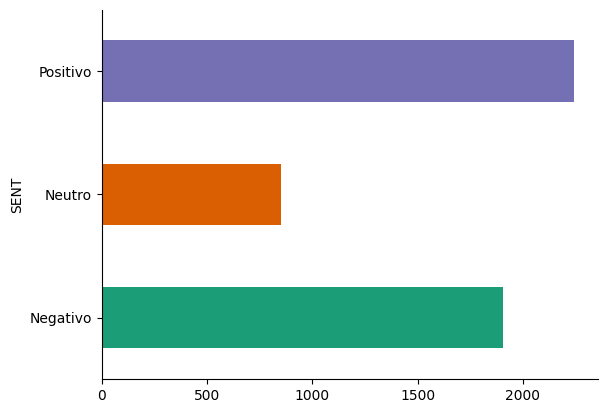

In [ ]:
# @title SENT_sp500

df_sp500.groupby('SENT').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

La etiquetas solo presentan un desbalanceo para la etiqueta "Neutro". Sin embargo son variaciones no tan significativas y se evidencia un comportamiento mayormente positivo dentro del índice.

- **¿El conjunto de datos cuenta con otras variables adicionales?, de ser así, debe analizar cuáles se incorporarán en el modelo y hacer un análisis descriptivo de las mismas.**

Todas las variables, preliminarmente seran tenidas en cuenta, a excepcion de la variable Vol. Y la variable de etiquetas que creamos, por lo tanto se hace el siguiente analisis descriptivo de las variables:

<ipython-input-8-13f87bdaf756>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_sp500, x='% var.', y='SENT', inner='box', palette='Dark2')


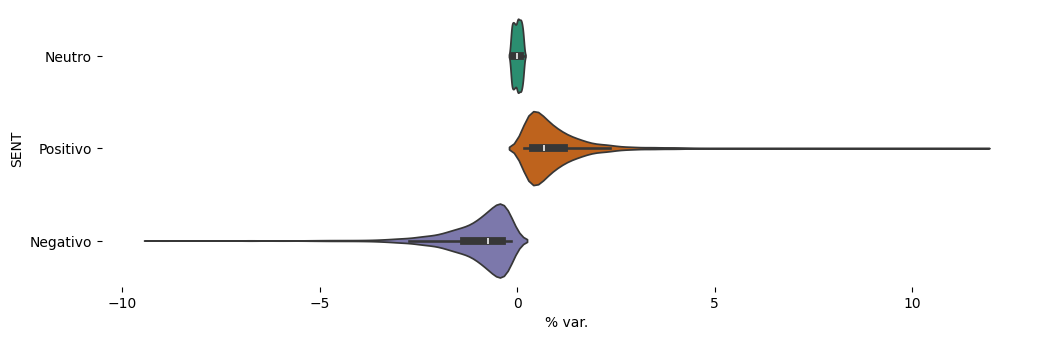

In [ ]:
figsize = (12, 1.2 * len(df_sp500['SENT'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_sp500, x='% var.', y='SENT', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

En el anterior grafico se evidencia de mejor manera como se asignaron las etiquetas del comportamiento del mercado, y entre que valores se encuentra el rango de variacion de cada una de ellas. El rango de variacion de la etiqueta Neutra es corto pero se debe a que no es tan relevante a la hora de dar suerencias de inversion.

#### Comportamiento precio de apertura y cierre

> *Grafico interactivo, se puede hacer zoom y seleccionar la variable de estudio*

In [ ]:
# Asegúrate de tener 'df_sp500' correctamente cargado y procesado
df_sp500['Fecha'] = pd.to_datetime(df_sp500['Fecha'], format='%d.%m.%Y')
df_sp500['Último']=df_sp500['Último'].str.replace('.', '').str.replace(',', '.').astype(float)
df_sp500['Apertura']=df_sp500['Apertura'].str.replace('.', '').str.replace(',', '.').astype(float)

# Crear el gráfico interactivo
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, shared_yaxes=True,
                    subplot_titles=("Comportamiento a lo largo del tiempo"))

# Agregar las líneas correspondientes a cada variable
fig.add_trace(go.Scatter(x=df_sp500['Fecha'], y=df_sp500['Último'], mode='lines', name='Último'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_sp500['Fecha'], y=df_sp500['Apertura'], mode='lines', name='Apertura'), row=1, col=1)

# Actualizar el diseño del gráfico
fig.update_layout(title_text="Comportamiento a lo largo del tiempo",
                  xaxis_title="Fecha",
                  yaxis_title="Valor",
                  showlegend=True)

# Agregar botones de selección de variable
buttons = []
for var in ['Último', 'Apertura']:
    buttons.append(dict(method='update',
                        label=var,
                        args=[{'visible': [col == var for col in ['Último', 'Apertura']]}]))

fig.update_layout(updatemenus=[dict(active=0, buttons=buttons)])

# Mostrar el gráfico interactivo
fig.show()


#### Comportamiento precio maximo y minimo

> *Grafico interactivo, se puede hacer zoom y seleccionar la variable de estudio*

In [ ]:
# Asegúrate de tener 'df_sp500' correctamente cargado y procesado
df_sp500['Máximo']=df_sp500['Máximo'].str.replace('.', '').str.replace(',', '.').astype(float)
df_sp500['Mínimo']=df_sp500['Mínimo'].str.replace('.', '').str.replace(',', '.').astype(float)
# Crear el gráfico interactivo
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, shared_yaxes=True,
                    subplot_titles=("Comportamiento a lo largo del tiempo"))

# Agregar las líneas correspondientes a cada variable
fig.add_trace(go.Scatter(x=df_sp500['Fecha'], y=df_sp500['Máximo'], mode='lines', name='Máximo'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_sp500['Fecha'], y=df_sp500['Mínimo'], mode='lines', name='Mínimo'), row=1, col=1)

# Actualizar el diseño del gráfico
fig.update_layout(title_text="Comportamiento a lo largo del tiempo",
                  xaxis_title="Fecha",
                  yaxis_title="Valor",
                  showlegend=True)

# Agregar botones de selección de variable
buttons = []
for var in [ 'Máximo', 'Mínimo']:
    buttons.append(dict(method='update',
                        label=var,
                        args=[{'visible': [col == var for col in [ 'Máximo', 'Mínimo']]}]))

fig.update_layout(updatemenus=[dict(active=0, buttons=buttons)])

# Mostrar el gráfico interactivo
fig.show()


#### Rango de valores y distribucion para cada una de las variables



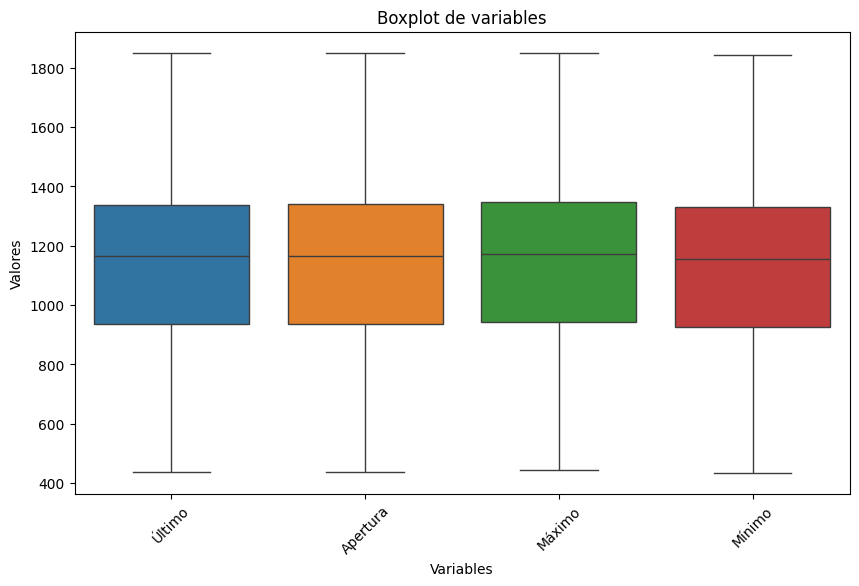

In [ ]:
# Seleccionar las columnas relevantes para el boxplot
columns_to_plot = ['Último', 'Apertura', 'Máximo', 'Mínimo']

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sp500[columns_to_plot])
plt.title('Boxplot de variables')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

Se ve un comportamiento similar para todas las variables, los precios no han tenido valores atipiicos, ni muy bajos ni muy altos en comparacion con el rango normal del comportamiento de los precios.

### **1.4. Relación Entre Variables**
---

- **Analice si existe alguna relación entre las variables. Puede utilizar medidas de correlación o visualizaciones.**



En los graficos anteriores se ve una relacion directa entre las diferentes variables, esto se debe a que el precio del indice S&P 500 de un dia en especifico està muy ligado a su comportamiento durante ese dia, lo cual muestra una relacion muy directa. Sin embargo, estas variables seran tenidas en cuenta ya que el conjunto de estas demuestra la variabilidad que tuvo durante un dia el precio del indice y puede ayudar al modelo a dar sugerencias de inversion.

Adicionalmente, dado que el objetivo del proyecto involucra un comportamiento temporal, hay que analizar el comportamiento de los precios en un dia especifico con dias anteriores y que tanto se relaciona con el valor de este dia, esto serà util a la hora de determinar los dias anteriores a tener en cuenta para poder predecir un comportamiento futuro.

<Figure size 1000x600 with 0 Axes>

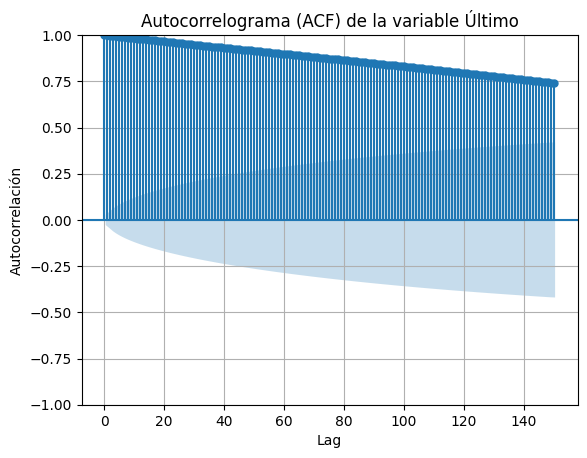

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Crear el autocorrelograma
plt.figure(figsize=(10, 6))
plot_acf(df_sp500['Último'], lags=150, alpha=0.05)
plt.title('Autocorrelograma (ACF) de la variable Último')
plt.xlabel('Lag')
plt.ylabel('Autocorrelación')
plt.grid(True)
plt.show()

EL anterior grafico muestra una correlacion alta del precio de la acciòn con el comportamiento en dias anteriores, incluso hasta 120 rezagos o dias anteriores tienen una correlacion suerior al 75%, sin embargo entre mas rezagos se tengan en cuenta mayor cantidad de variables se tendran que no seran del todo representativas del precio actual, por lo cual se tendran en cuenta solo los rezagos mas significativos con una correlacion superior al 90%, 30 rezagos o el comportamiento del indice en el ultimo mes.

- **Identifique si hay redundancia entre las variables para una posterior eliminación o selección.**

Como se indico, a pesar de la alta correlacion entre variables, se tendran en cuenta todas las variables ya que traen informacion de la variabilidad diaria del precio del indice y pueden no ser redundantes

## **2. Limpieza de los Datos**
---

La selección de las técnicas de preprocesamiento puede variar en cada conjunto de datos. Recuerde que puede aplicar (no necesariamente todas) las técnicas generales vistas en el curso, dependiendo si está trabajando con imagenes, datos estructurados, textos, etc.

In [ ]:
!wget 'https://drive.google.com/uc?export=view&id=1QvQewt31IAGzqxgutnzyVjcr9E7p5UPC' -O Datos_historicos_SP500.csv

df_sp500 = pd.read_csv('/content/Datos_historicos_SP500.csv', on_bad_lines='skip')
df_sp500.dtypes

--2024-04-27 16:03:58--  https://drive.google.com/uc?export=view&id=1QvQewt31IAGzqxgutnzyVjcr9E7p5UPC
Resolving drive.google.com (drive.google.com)... 74.125.26.100, 74.125.26.102, 74.125.26.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.26.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1QvQewt31IAGzqxgutnzyVjcr9E7p5UPC&export=view [following]
--2024-04-27 16:03:58--  https://drive.usercontent.google.com/download?id=1QvQewt31IAGzqxgutnzyVjcr9E7p5UPC&export=view
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.139.132, 2607:f8b0:400c:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.139.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330482 (323K) [application/octet-stream]
Saving to: ‘Datos_historicos_SP500.csv’

Datos_historicos_SP 100%[===================>] 322.74K  --.-KB/s    i

Fecha        object
Último       object
Apertura     object
Máximo       object
Mínimo       object
Vol.        float64
% var.       object
dtype: object

Es necesario realizar el cambio de formato en la variables para el analisis y procesamiento de los datos, se utiliza la funcion replace para cambiar los caracteres de (. % ,) en un formato que se pueda utilizar como numero flotante(float) sin perder la informacion. para la variable de la fecha, se se transformo estos datos a fomrato de fecha tipo dia.mes.año


In [ ]:
# ajustar el formato de los datos.
df_sp500['Fecha'] = pd.to_datetime(df_sp500['Fecha'], format='%d.%m.%Y')
df_sp500['Último']=df_sp500['Último'].str.replace('.', '').str.replace(',', '.').astype(float)
df_sp500['Apertura']=df_sp500['Apertura'].str.replace('.', '').str.replace(',', '.').astype(float)
df_sp500['Máximo']=df_sp500['Máximo'].str.replace('.', '').str.replace(',', '.').astype(float)
df_sp500['Mínimo']=df_sp500['Mínimo'].str.replace('.', '').str.replace(',', '.').astype(float)
df_sp500['% var.']=df_sp500['% var.'].str.replace('%', '').str.replace(',', '.').astype(float)

Finalmente se revisa los formatos de las varaibbles.

In [ ]:
df_sp500.dtypes

Fecha       datetime64[ns]
Último             float64
Apertura           float64
Máximo             float64
Mínimo             float64
Vol.               float64
% var.             float64
dtype: object

Se elimina la varaible Vol. como se explico anteriormente presenta valores nulos y no tiene informacion importante para esta aplicacion.

In [ ]:
df_sp500=df_sp500.drop(columns=["Vol."])
df_sp500

,Fecha,Último,Apertura,Máximo,Mínimo,% var.
0,2014-02-10,1799.84,1796.20,1799.94,1791.83,0.16
1,2014-02-07,1797.02,1776.01,1798.03,1776.01,1.33
2,2014-02-06,1773.43,1752.99,1774.06,1752.99,1.24
3,2014-02-05,1751.64,1753.38,1755.79,1737.92,-0.20
4,2014-02-04,1755.20,1743.82,1758.73,1743.82,0.76
...,...,...,...,...,...,...
4995,1994-04-08,447.10,450.90,450.90,445.50,-0.84
4996,1994-04-07,450.90,448.10,451.10,446.40,0.62
4997,1994-04-06,448.10,448.30,449.60,445.00,-0.04
4998,1994-04-05,448.30,439.10,448.30,438.90,2.14


Se agrega la columna de SEN segun lo explicado anteriormente como  etiquetas de varabiable categorica para ver describir comportamientos positivos negativos o neutros

In [ ]:
df_sp500['SENT']=['Positivo' if var>=0.17 else 'Negativo' if var<=-0.17 else 'Neutro' for var in df_sp500['% var.'] ]
df_sp500

,Fecha,Último,Apertura,Máximo,Mínimo,% var.,SENT
0,2014-02-10,1799.84,1796.20,1799.94,1791.83,0.16,Neutro
1,2014-02-07,1797.02,1776.01,1798.03,1776.01,1.33,Positivo
2,2014-02-06,1773.43,1752.99,1774.06,1752.99,1.24,Positivo
3,2014-02-05,1751.64,1753.38,1755.79,1737.92,-0.20,Negativo
4,2014-02-04,1755.20,1743.82,1758.73,1743.82,0.76,Positivo
...,...,...,...,...,...,...,...
4995,1994-04-08,447.10,450.90,450.90,445.50,-0.84,Negativo
4996,1994-04-07,450.90,448.10,451.10,446.40,0.62,Positivo
4997,1994-04-06,448.10,448.30,449.60,445.00,-0.04,Neutro
4998,1994-04-05,448.30,439.10,448.30,438.90,2.14,Positivo


# **Diseño e implementación experimental**
---


## **1. Particion del conjunto de datos**
---


In [ ]:
# Cargar el DataFrame
# df_sp500 ya contiene los datos necesarios

# Aplicar one-hot encoding a la variable objetivo SENT
label_encoder = LabelEncoder()
y = df_sp500["Último"]

# Seleccionar las características y la variable objetivo
X_columns = ["Último", "Apertura", "Máximo", "Mínimo"]
X = df_sp500[X_columns].values

# Normalizar las características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))  # Corrección aquí

# Crear los rezagos de las características
lags = 30
X_lagged = []
y_lagged = []
for i in range(lags, len(X_scaled)):
    X_lagged.append(X_scaled[i-lags:i])
    y_lagged.append(y_scaled[i])  # No hace falta cambiar aquí

X_lagged = np.array(X_lagged)
y_lagged = np.array(y_lagged)

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
train_size = int(0.7 * len(X_lagged))
val_size = int(0.2 * len(X_lagged))
test_size = len(X_lagged) - train_size - val_size

X_train, X_val, X_test = X_lagged[:train_size], X_lagged[train_size:train_size+val_size], X_lagged[-test_size:]
y_train, y_val, y_test = y_lagged[:train_size], y_lagged[train_size:train_size+val_size], y_lagged[-test_size:]


In [ ]:
print("X_train shape: "+str(X_train.shape))
print("X_train shape: "+str(X_val.shape))
print("X_test shape: "+str(X_test.shape))

X_train shape: (3479, 30, 4)
X_train shape: (994, 30, 4)
X_test shape: (497, 30, 4)


In [ ]:
print("y_train shape: "+str(y_train.shape))
print("y_train shape: "+str(y_val.shape))
print("y_test shape: "+str(y_test.shape))

y_train shape: (3479, 1)
y_train shape: (994, 1)
y_test shape: (497, 1)


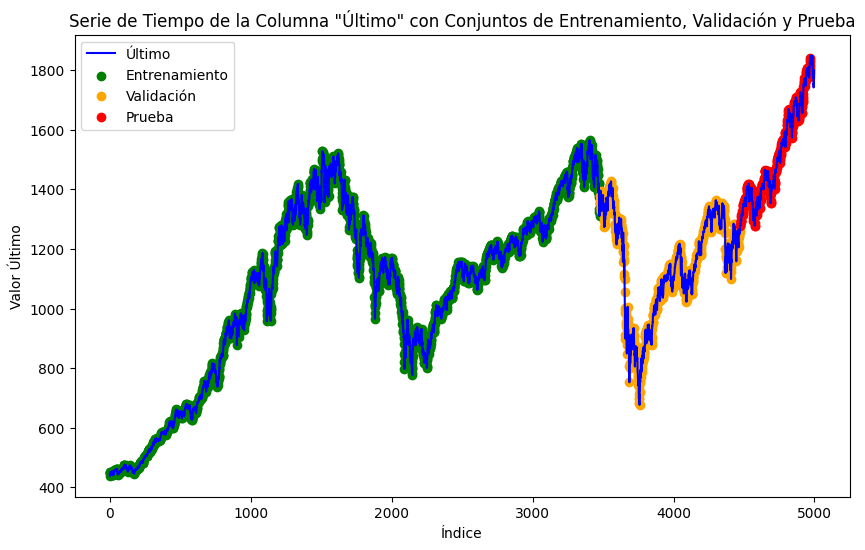

In [ ]:
# Obtener los datos de la columna "Último"
ultimo_column = df_sp500['Último']

# Crear un arreglo de índices para la serie de tiempo
indices = range(len(ultimo_column))

# Graficar la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(indices, ultimo_column, label='Último', color='blue')

# Resaltar los datos de entrenamiento, validación y prueba
train_indices = range(len(y_train))
val_indices = range(len(y_train), len(y_train) + len(y_val))
test_indices = range(len(y_train) + len(y_val), len(y_train) + len(y_val) + len(y_test))

plt.scatter(train_indices, ultimo_column[:len(y_train)], color='green', label='Entrenamiento')
plt.scatter(val_indices, ultimo_column[len(y_train):len(y_train) + len(y_val)], color='orange', label='Validación')
plt.scatter(test_indices, ultimo_column[len(y_train) + len(y_val):len(y_train) + len(y_val) + len(y_test)], color='red', label='Prueba')

# Etiquetas y leyenda
plt.xlabel('Índice')
plt.ylabel('Valor Último')
plt.title('Serie de Tiempo de la Columna "Último" con Conjuntos de Entrenamiento, Validación y Prueba')
plt.legend()
plt.show()

## **2. Selección y diseño de modelos**
---


Se seleccionan tres modelos para la clasificacion de los datos historicos del indice S&P 500 en 3 grupos, positivos, neutro y negativo. Esto con el fin de poder dar una estimación General del comportamiento del mercado en el dia siguente.

**LSTM**

La LSTM es una variante de las RNN diseñada para abordar el problema del olvido a largo plazo que afecta a las RNN estándar. Utiliza una estructura de celdas de memoria con compuertas de entrada, salida y olvido, lo que le permite recordar información relevante de largo plazo y descartar información irrelevante. En el caso del histórico del índice S&P 500, donde los patrones pueden tener dependencias a largo plazo, como ciclos económicos o tendencias a largo plazo, la LSTM podría ser útil para capturar estas relaciones temporales complejas y hacer predicciones precisas.

**GRU**

La GRU es una variante más ligera de la LSTM que combina algunas de las compuertas de la LSTM en una sola compuerta de actualización. Esto simplifica la arquitectura y reduce el número de parámetros, lo que puede hacer que la GRU sea más rápida de entrenar y menos propensa al sobreajuste, especialmente en conjuntos de datos más pequeños o cuando los datos son menos complejos. En el caso del índice S&P 500, donde la velocidad de entrenamiento y la capacidad de generalización pueden ser importantes debido a la gran cantidad de datos disponibles, la GRU podría ser una opción adecuada.

**SimpleRNN**

A diferencia de la LSTM y la GRU, el SimpleRNN no tiene mecanismos de compuertas para manejar el olvido a largo plazo, lo que puede hacerlo menos efectivo para capturar dependencias a largo plazo en los datos. Sin embargo, el SimpleRNN es computacionalmente más eficiente y puede ser más fácil de interpretar y entrenar en comparación con los modelos más complejos como la LSTM y la GRU. Para el histórico del índice S&P 500, donde los patrones pueden ser relativamente simples y no requerir una memoria a largo plazo sofisticada, el SimpleRNN podría proporcionar resultados satisfactorios con menos recursos computacionales.

## **3. Implementación de los modelos**
---


### LSTM

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
                  filepath='best_weights_LSTM.h5',
                  monitor="val_mae",
                  verbose=1,
                  save_best_only=True,
                  save_weights_only=True,
                  mode="min",
            )
stopping = tf.keras.callbacks.EarlyStopping(
                monitor="val_mae",
                patience=10,
                verbose=1,
                mode="min",
                restore_best_weights=True,
            )

# Construir el modelo LSTM
model = Sequential([
    LSTM(250, return_sequences=True, activation='sigmoid', input_shape=(30, 4)),
    LSTM(units=50, activation='sigmoid'),
    Dropout(0.2),
    Dense(units=1, activation='relu')  # 3 neuronas en la capa de salida para clasificación
])

# Compilar el modelo
model.compile(loss='mse',
              optimizer=tf.optimizers.Adam(learning_rate=1e-3), metrics=['mae'])

# Ajustar el modelo
history = model.fit(X_train, y_train,
                    epochs=50, batch_size=32, validation_data=(X_val, y_val),
                    callbacks=[checkpoint, stopping])

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


Epoch 1/50
109/109 [==============================] - ETA: 0s - loss: 0.0606 - mae: 0.1949
Epoch 1: val_mae improved from inf to 0.07139, saving model to best_weights_LSTM.h5
109/109 [==============================] - 17s 126ms/step - loss: 0.0606 - mae: 0.1949 - val_loss: 0.0072 - val_mae: 0.0714
Epoch 2/50
109/109 [==============================] - ETA: 0s - loss: 0.0113 - mae: 0.0814
Epoch 2: val_mae improved from 0.07139 to 0.02380, saving model to best_weights_LSTM.h5
109/109 [==============================] - 13s 121ms/step - loss: 0.0113 - mae: 0.0814 - val_loss: 8.9888e-04 - val_mae: 0.0238
Epoch 3/50
109/109 [==============================] - ETA: 0s - loss: 0.0049 - mae: 0.0546
Epoch 3: val_mae did not improve from 0.02380
109/109 [==============================] - 19s 174ms/step - loss: 0.0049 - mae: 0.0546 - val_loss: 0.0014 - val_mae: 0.0307
Epoch 4/50
109/109 [==============================] - ETA: 0s - loss: 0.0048 - mae: 0.0547
Epoch 4: val_mae improved from 0.02380 to 

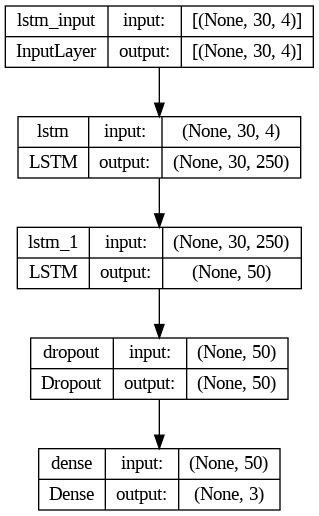

In [ ]:


plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Mostrar la imagen en la libreta

Image(filename='model_plot.png')

16/16 [==============================] - 1s 33ms/step


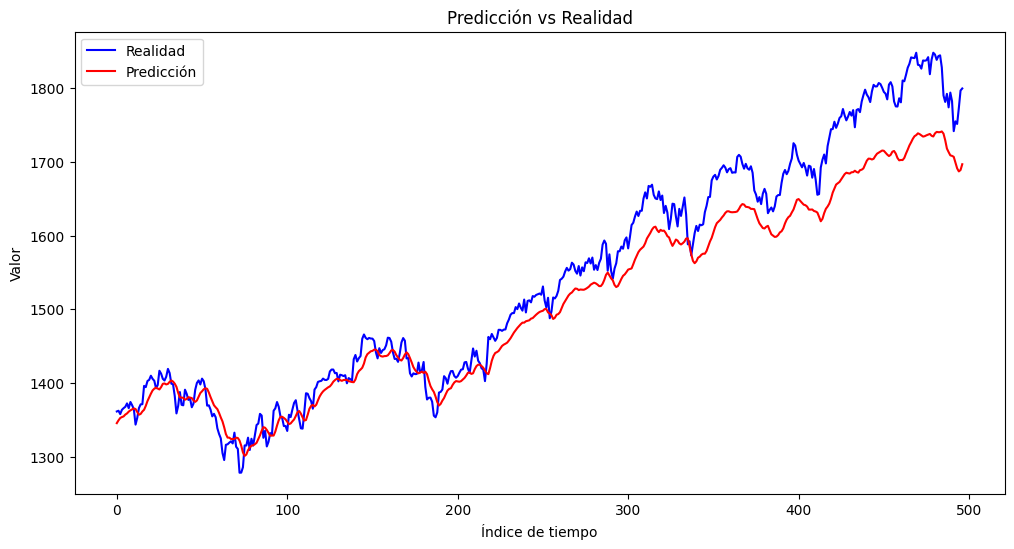

32/32 [==============================] - 2s 49ms/step
Métricas del modelo:
Loss en entrenamiento (MSE): 669.0848396049877
MAE en entrenamiento: 20.399145607110857
Loss en validación (MSE): 1027.7632635907626
MAE en validación: 21.696981503277474
16/16 [==============================] - 1s 37ms/step - loss: 0.0011 - mae: 0.0265
Loss en prueba (MSE): 0.001133372075855732
MAE en prueba: 0.026471059769392014


In [ ]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Desnormalizar las predicciones y los valores reales
y_pred_unscaled = scaler.inverse_transform(y_pred)
y_test_unscaled = scaler.inverse_transform(y_test)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label='Realidad', color='blue')
plt.plot(y_pred_unscaled, label='Predicción', color='red')
plt.title('Predicción vs Realidad')
plt.xlabel('Índice de tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

# Reporte de los resultados del modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Desnormalizar los datos para calcular las métricas
y_train_unscaled = scaler.inverse_transform(y_train)
y_val_unscaled = scaler.inverse_transform(y_val)

# Predecir sobre los conjuntos de entrenamiento y validación para calcular las métricas
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Desnormalizar las predicciones
y_train_pred_unscaled = scaler.inverse_transform(y_train_pred)
y_val_pred_unscaled = scaler.inverse_transform(y_val_pred)

# Calcular las métricas
train_mse = mean_squared_error(y_train_unscaled, y_train_pred_unscaled)
train_mae = mean_absolute_error(y_train_unscaled, y_train_pred_unscaled)
val_mse = mean_squared_error(y_val_unscaled, y_val_pred_unscaled)
val_mae = mean_absolute_error(y_val_unscaled, y_val_pred_unscaled)

print("Métricas del modelo:")
print(f"Loss en entrenamiento (MSE): {train_mse}")
print(f"MAE en entrenamiento: {train_mae}")
print(f"Loss en validación (MSE): {val_mse}")
print(f"MAE en validación: {val_mae}")

# Evaluar el modelo en el conjunto de prueba
loss, mae = model.evaluate(X_test, y_test)
print(f'Loss en prueba (MSE): {loss}')
print(f'MAE en prueba: {mae}')


### GRU

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
                  filepath='best_weights_GRU.h5',
                  monitor="val_mae",
                  verbose=1,
                  save_best_only=True,
                  save_weights_only=True,
                  mode="min",
            )
stopping = tf.keras.callbacks.EarlyStopping(
                monitor="val_mae",
                patience=10,
                verbose=1,
                mode="min",
                restore_best_weights=True,
            )

# Construir el modelo GRU
model = Sequential([
    GRU(250, return_sequences=True, activation='sigmoid', input_shape=(30, 4)),
    GRU(units=50, activation='sigmoid'),
    Dropout(0.2),
    Dense(units=1, activation='relu')  # 3 neuronas en la capa de salida para clasificación
])

# Compilar el modelo
model.compile(loss='mse',
              optimizer=tf.optimizers.Adam(learning_rate=1e-3), metrics=['mae'])

# Ajustar el modelo
history = model.fit(X_train, y_train,
                    epochs=50, batch_size=32, validation_data=(X_val, y_val),
                    callbacks=[checkpoint, stopping])

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


Epoch 1/50
109/109 [==============================] - ETA: 0s - loss: 0.0792 - mae: 0.2203
Epoch 1: val_mae improved from inf to 0.07621, saving model to best_weights_GRU.h5
109/109 [==============================] - 15s 110ms/step - loss: 0.0792 - mae: 0.2203 - val_loss: 0.0081 - val_mae: 0.0762
Epoch 2/50
109/109 [==============================] - ETA: 0s - loss: 0.0165 - mae: 0.0986
Epoch 2: val_mae improved from 0.07621 to 0.02595, saving model to best_weights_GRU.h5
109/109 [==============================] - 11s 104ms/step - loss: 0.0165 - mae: 0.0986 - val_loss: 0.0013 - val_mae: 0.0259
Epoch 3/50
109/109 [==============================] - ETA: 0s - loss: 0.0060 - mae: 0.0606
Epoch 3: val_mae did not improve from 0.02595
109/109 [==============================] - 13s 116ms/step - loss: 0.0060 - mae: 0.0606 - val_loss: 0.0025 - val_mae: 0.0360
Epoch 4/50
109/109 [==============================] - ETA: 0s - loss: 0.0048 - mae: 0.0546
Epoch 4: val_mae did not improve from 0.02595
10

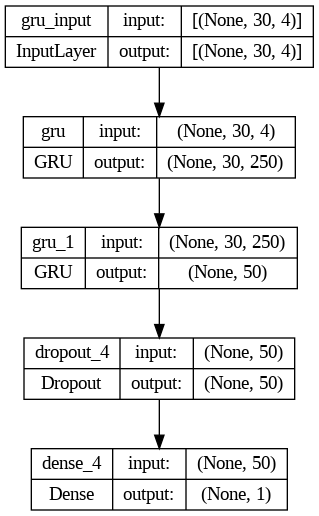

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Mostrar la imagen en la libreta

Image(filename='model_plot.png')

16/16 [==============================] - 0s 28ms/step


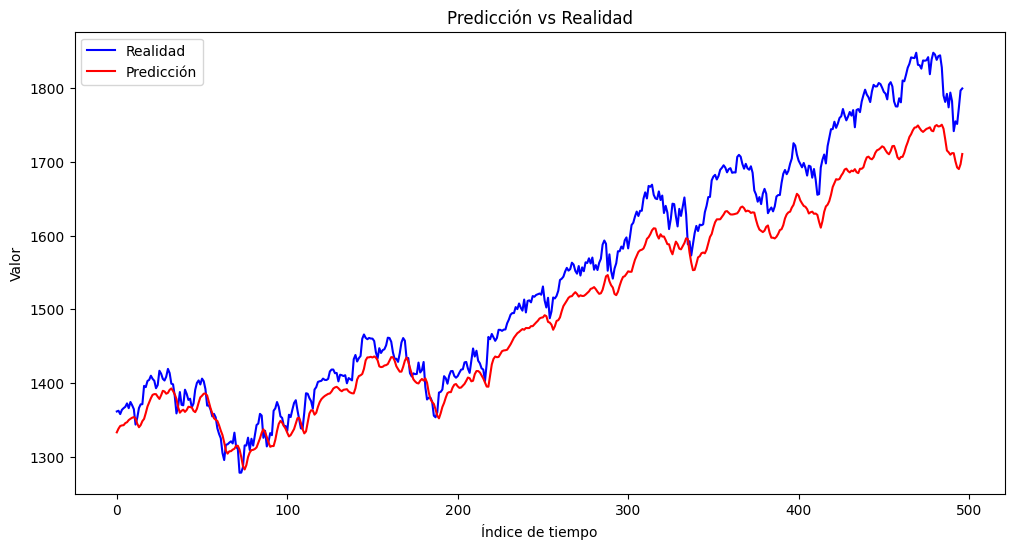

32/32 [==============================] - 1s 27ms/step
Métricas del modelo:
Loss en entrenamiento (MSE): 975.6697176823905
MAE en entrenamiento: 24.409802838725984
Loss en validación (MSE): 883.9487972984649
MAE en validación: 21.326348019759156
16/16 [==============================] - 1s 71ms/step - loss: 0.0012 - mae: 0.0285
Loss en prueba (MSE): 0.0011584118474274874
MAE en prueba: 0.028520962223410606


In [ ]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Desnormalizar las predicciones y los valores reales
y_pred_unscaled = scaler.inverse_transform(y_pred)
y_test_unscaled = scaler.inverse_transform(y_test)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label='Realidad', color='blue')
plt.plot(y_pred_unscaled, label='Predicción', color='red')
plt.title('Predicción vs Realidad')
plt.xlabel('Índice de tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

# Reporte de los resultados del modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Desnormalizar los datos para calcular las métricas
y_train_unscaled = scaler.inverse_transform(y_train)
y_val_unscaled = scaler.inverse_transform(y_val)

# Predecir sobre los conjuntos de entrenamiento y validación para calcular las métricas
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Desnormalizar las predicciones
y_train_pred_unscaled = scaler.inverse_transform(y_train_pred)
y_val_pred_unscaled = scaler.inverse_transform(y_val_pred)

# Calcular las métricas
train_mse = mean_squared_error(y_train_unscaled, y_train_pred_unscaled)
train_mae = mean_absolute_error(y_train_unscaled, y_train_pred_unscaled)
val_mse = mean_squared_error(y_val_unscaled, y_val_pred_unscaled)
val_mae = mean_absolute_error(y_val_unscaled, y_val_pred_unscaled)

print("Métricas del modelo:")
print(f"Loss en entrenamiento (MSE): {train_mse}")
print(f"MAE en entrenamiento: {train_mae}")
print(f"Loss en validación (MSE): {val_mse}")
print(f"MAE en validación: {val_mae}")

# Evaluar el modelo en el conjunto de prueba
loss, mae = model.evaluate(X_test, y_test)
print(f'Loss en prueba (MSE): {loss}')
print(f'MAE en prueba: {mae}')


### SimpleRNN

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
                  filepath='best_weights_SRNN.h5',
                  monitor="val_mae",
                  verbose=1,
                  save_best_only=True,
                  save_weights_only=True,
                  mode="min",
            )
stopping = tf.keras.callbacks.EarlyStopping(
                monitor="val_mae",
                patience=10,
                verbose=1,
                mode="min",
                restore_best_weights=True,
            )

# Construir el modelo SimpleRNN
model = Sequential([
    SimpleRNN(250, return_sequences=True, activation='sigmoid', input_shape=(30, 4)),
    SimpleRNN(units=50, activation='sigmoid'),
    Dropout(0.2),
    Dense(units=1, activation='relu')  # 3 neuronas en la capa de salida para clasificación
])

# Compilar el modelo
model.compile(loss='mse',
              optimizer=tf.optimizers.Adam(learning_rate=1e-3), metrics=['mae'])

# Ajustar el modelo
history = model.fit(X_train, y_train,
                    epochs=50, batch_size=32, validation_data=(X_val, y_val),
                    callbacks=[checkpoint, stopping])

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


Epoch 1/50
108/109 [============================>.] - ETA: 0s - loss: 0.1438 - mae: 0.3090
Epoch 1: val_mae improved from inf to 0.11844, saving model to best_weights_SRNN.h5
109/109 [==============================] - 9s 60ms/step - loss: 0.1430 - mae: 0.3079 - val_loss: 0.0182 - val_mae: 0.1184
Epoch 2/50
108/109 [============================>.] - ETA: 0s - loss: 0.0249 - mae: 0.1234
Epoch 2: val_mae improved from 0.11844 to 0.07672, saving model to best_weights_SRNN.h5
109/109 [==============================] - 5s 43ms/step - loss: 0.0248 - mae: 0.1229 - val_loss: 0.0062 - val_mae: 0.0767
Epoch 3/50
109/109 [==============================] - ETA: 0s - loss: 0.0066 - mae: 0.0637
Epoch 3: val_mae improved from 0.07672 to 0.05232, saving model to best_weights_SRNN.h5
109/109 [==============================] - 6s 57ms/step - loss: 0.0066 - mae: 0.0637 - val_loss: 0.0031 - val_mae: 0.0523
Epoch 4/50
108/109 [============================>.] - ETA: 0s - loss: 0.0047 - mae: 0.0534
Epoch 4: v

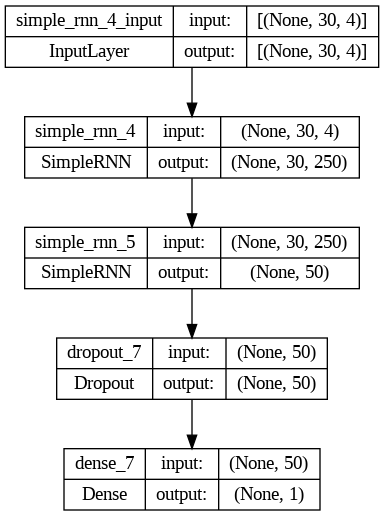

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Mostrar la imagen en la libreta

Image(filename='model_plot.png')

16/16 [==============================] - 1s 18ms/step


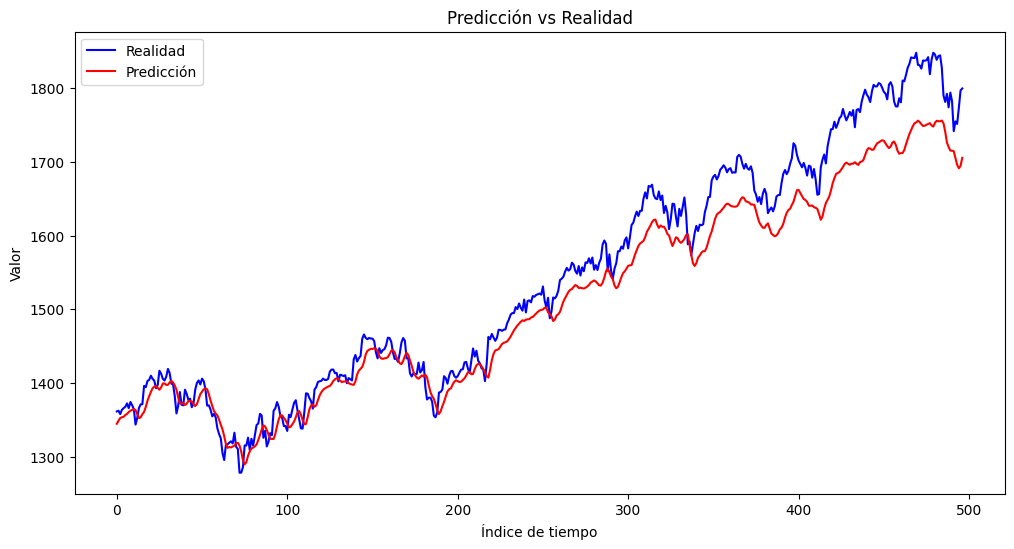

32/32 [==============================] - 0s 11ms/step
Métricas del modelo:
Loss en entrenamiento (MSE): 336.86337619245154
MAE en entrenamiento: 13.82230869136414
Loss en validación (MSE): 663.1884988411913
MAE en validación: 18.806545471559815
16/16 [==============================] - 0s 13ms/step - loss: 8.8436e-04 - mae: 0.0238
Loss en prueba (MSE): 0.0008843588293530047
MAE en prueba: 0.023802194744348526


In [ ]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Desnormalizar las predicciones y los valores reales
y_pred_unscaled = scaler.inverse_transform(y_pred)
y_test_unscaled = scaler.inverse_transform(y_test)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label='Realidad', color='blue')
plt.plot(y_pred_unscaled, label='Predicción', color='red')
plt.title('Predicción vs Realidad')
plt.xlabel('Índice de tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

# Reporte de los resultados del modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Desnormalizar los datos para calcular las métricas
y_train_unscaled = scaler.inverse_transform(y_train)
y_val_unscaled = scaler.inverse_transform(y_val)

# Predecir sobre los conjuntos de entrenamiento y validación para calcular las métricas
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Desnormalizar las predicciones
y_train_pred_unscaled = scaler.inverse_transform(y_train_pred)
y_val_pred_unscaled = scaler.inverse_transform(y_val_pred)

# Calcular las métricas
train_mse = mean_squared_error(y_train_unscaled, y_train_pred_unscaled)
train_mae = mean_absolute_error(y_train_unscaled, y_train_pred_unscaled)
val_mse = mean_squared_error(y_val_unscaled, y_val_pred_unscaled)
val_mae = mean_absolute_error(y_val_unscaled, y_val_pred_unscaled)

print("Métricas del modelo:")
print(f"Loss en entrenamiento (MSE): {train_mse}")
print(f"MAE en entrenamiento: {train_mae}")
print(f"Loss en validación (MSE): {val_mse}")
print(f"MAE en validación: {val_mae}")

# Evaluar el modelo en el conjunto de prueba
loss, mae = model.evaluate(X_test, y_test)
print(f'Loss en prueba (MSE): {loss}')
print(f'MAE en prueba: {mae}')


# **Entrenamiento y Validación**
---


## **1. Entrenamiento del Modelo y Selección de Hiperparámetros**
---


Los tres modelos LSTM, GRU y SimpleRNN fueron evaluados en términos de sus métricas de regresión, específicamente el Error Absoluto Medio (MAE) y el Error Cuadrático Medio (MSE), utilizando la función de pérdida (Loss). Después de la evaluación, se seleccionó el modelo SimpleRNN debido a su mejor rendimiento en estas métricas.

A continuación se presenta el comportamiento de los tres modelos tanto en los conjuntos de validación como en los de pruebas:

# **LSTM**

  Pruebas:

	*   MSE: 0.00113
	*  MAE: 0.02647


# **GRU**



  Pruebas:

	*   MSE: 0.001158
	*  MAE: 0.02852

# **SimpleRNN**


.  Pruebas:

	*   MSE: 0.000843
	*  MAE: 0.0238


A partir de estos resultados, se decidió utilizar el modelo SimpleRNN debido a su menor Loss y MAE tanto en los conjuntos de validación como en los de pruebas. Ahora se procederá a cargar los datos para continuar con el análisis.



inicialmente se cargan los datos.

In [ ]:
!wget 'https://drive.google.com/uc?export=view&id=1QvQewt31IAGzqxgutnzyVjcr9E7p5UPC' -O Datos_historicos_SP500.csv
df_sp500 = pd.read_csv('/content/Datos_historicos_SP500.csv', on_bad_lines='skip')
df_sp500['Fecha'] = pd.to_datetime(df_sp500['Fecha'], format='%d.%m.%Y')
df_sp500['Último']=df_sp500['Último'].str.replace('.', '').str.replace(',', '.').astype(float)
df_sp500['Apertura']=df_sp500['Apertura'].str.replace('.', '').str.replace(',', '.').astype(float)
df_sp500['Máximo']=df_sp500['Máximo'].str.replace('.', '').str.replace(',', '.').astype(float)
df_sp500['Mínimo']=df_sp500['Mínimo'].str.replace('.', '').str.replace(',', '.').astype(float)
df_sp500['% var.']=df_sp500['% var.'].str.replace('%', '').str.replace(',', '.').astype(float)
df_sp500=df_sp500.drop(columns=["Vol."])
df_sp500['SENT']=['Positivo' if var>=0.17 else 'Negativo' if var<=-0.17 else 'Neutro' for var in df_sp500['% var.'] ]
df_sp500=df_sp500.sort_values(by='Fecha').reset_index(drop=True)
df_sp500

--2024-04-26 03:40:03--  https://drive.google.com/uc?export=view&id=1QvQewt31IAGzqxgutnzyVjcr9E7p5UPC
Resolving drive.google.com (drive.google.com)... 172.217.7.46, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.7.46|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1QvQewt31IAGzqxgutnzyVjcr9E7p5UPC&export=view [following]
--2024-04-26 03:40:03--  https://drive.usercontent.google.com/download?id=1QvQewt31IAGzqxgutnzyVjcr9E7p5UPC&export=view
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.7.33, 2607:f8b0:4025:815::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.7.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330482 (323K) [application/octet-stream]
Saving to: ‘Datos_historicos_SP500.csv’

Datos_historicos_SP 100%[===================>] 322.74K  --.-KB/s    in 0.06s   

2

,Fecha,Último,Apertura,Máximo,Mínimo,% var.,SENT
0,1994-04-04,438.90,445.70,445.80,435.90,-1.55,Negativo
1,1994-04-05,448.30,439.10,448.30,438.90,2.14,Positivo
2,1994-04-06,448.10,448.30,449.60,445.00,-0.04,Neutro
3,1994-04-07,450.90,448.10,451.10,446.40,0.62,Positivo
4,1994-04-08,447.10,450.90,450.90,445.50,-0.84,Negativo
...,...,...,...,...,...,...,...
4995,2014-02-04,1755.20,1743.82,1758.73,1743.82,0.76,Positivo
4996,2014-02-05,1751.64,1753.38,1755.79,1737.92,-0.20,Negativo
4997,2014-02-06,1773.43,1752.99,1774.06,1752.99,1.24,Positivo
4998,2014-02-07,1797.02,1776.01,1798.03,1776.01,1.33,Positivo


In [ ]:
# Cargar el DataFrame
# df_sp500 ya contiene los datos necesarios

# Aplicar one-hot encoding a la variable objetivo SENT
label_encoder = LabelEncoder()
y = df_sp500["Último"]

# Seleccionar las características y la variable objetivo
X_columns = ["Último", "Apertura", "Máximo", "Mínimo"]
X = df_sp500[X_columns].values

# Normalizar las características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))  # Corrección aquí

# Crear los rezagos de las características
lags = 30
X_lagged = []
y_lagged = []
for i in range(lags, len(X_scaled)):
    X_lagged.append(X_scaled[i-lags:i])
    y_lagged.append(y_scaled[i])  # No hace falta cambiar aquí

X_lagged = np.array(X_lagged)
y_lagged = np.array(y_lagged)

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
train_size = int(0.7 * len(X_lagged))
val_size = int(0.2 * len(X_lagged))
test_size = len(X_lagged) - train_size - val_size

X_train, X_val, X_test = X_lagged[:train_size], X_lagged[train_size:train_size+val_size], X_lagged[-test_size:]
y_train, y_val, y_test = y_lagged[:train_size], y_lagged[train_size:train_size+val_size], y_lagged[-test_size:]


Se carga el modelo seleccionado, este modelo consiste en dos capas de SimpleRNN seguidas de una capa de Dropout y una capa densa que produce la salida. Los hiperparámetros que pueden ser ajustados incluyen la función de activación, el número de unidades en la capa SimpleRNN, la tasa de dropout, y el optimizador.

In [ ]:

checkpoint = tf.keras.callbacks.ModelCheckpoint(
                  filepath='best_weights_SRNN.weights.h5',
                  monitor="val_mae",
                  verbose=1,
                  save_best_only=True,
                  save_weights_only=True,
                  mode="min",
            )
stopping = tf.keras.callbacks.EarlyStopping(
                monitor="val_mae",
                patience=10,
                verbose=1,
                mode="min",
                restore_best_weights=True,
            )


# Función para crear el modelo
# Construir el modelo SimpleRNN
model = Sequential([
    SimpleRNN(250, return_sequences=True, activation='sigmoid', input_shape=(30, 4)),
    SimpleRNN(units=50, activation='sigmoid'),
    Dropout(0.2),
    Dense(units=1, activation='relu')  # 3 neuronas en la capa de salida para clasificación
])

# Compilar el modelo
model.compile(loss='mse',
              optimizer=tf.optimizers.Adam(learning_rate=1e-3), metrics=['mae'])

# Ajustar el modelo
history = model.fit(X_train, y_train,
                    epochs=50, batch_size=32, validation_data=(X_val, y_val),
                    callbacks=[checkpoint, stopping])

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)



Epoch 1/50
108/109 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1085 - mae: 0.2653
Epoch 1: val_mae improved from inf to 0.10165, saving model to best_weights_SRNN.weights.h5
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.1078 - mae: 0.2643 - val_loss: 0.0134 - val_mae: 0.1017
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0256 - mae: 0.1271
Epoch 2: val_mae improved from 0.10165 to 0.01870, saving model to best_weights_SRNN.weights.h5
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0255 - mae: 0.1269 - val_loss: 4.9513e-04 - val_mae: 0.0187
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0074 - mae: 0.0675
Epoch 3: val_mae did not improve from 0.01870
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0074 - mae: 0.0674 - val_loss: 9.2374e-04 - val_mae: 0.0258
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0045 - mae: 0.0522
Epoch 4: val_mae improved from 0.01870 to 0.01732, saving model to best_weights_SRNN.weights.h5
109/109 ━━

El análisis de los valores de Error Absoluto Medio (MAE) y Error Cuadrático Medio (MSE) revela que el modelo exhibe un rendimiento satisfactorio en la predicción de la serie temporal del S&P 500. Los valores de MAE y MSE proporcionan una indicación clara de la precisión y la calidad de las predicciones del modelo.

Es importante destacar que se llevó a cabo una búsqueda de hiperparámetros centrada únicamente en el número de unidades en la capa SimpleRNN. Se decidió dejar fijos otros hiperparámetros, como la tasa de dropout y el optimizador, debido a que se considera que el modelo ya ofrece un rendimiento óptimo y solo requiere ajustes mínimos.

Esta estrategia de optimización selectiva permite mejorar la eficiencia del proceso de ajuste del modelo al centrarse en los aspectos que pueden tener un impacto significativo en el rendimiento predictivo, mientras se minimiza la necesidad de ajustar otros hiperparámetros que pueden no ser críticos en este contexto.

#### Grid Search para units en las capas de SimpleRNN

Elaboramos un grid search de las unidades de las capas de SimpleRNN usando la funcionde activacion Relu para evaluar la arquitectura de la red neuronal bajo diferentes configuraciones

In [ ]:

checkpoint = tf.keras.callbacks.ModelCheckpoint(
                  filepath='best_weights_SRNN.weights.h5',
                  monitor="val_mae",
                  verbose=1,
                  save_best_only=True,
                  save_weights_only=True,
                  mode="min",
            )
stopping = tf.keras.callbacks.EarlyStopping(
                monitor="val_mae",
                patience=10,
                verbose=1,
                mode="min",
                restore_best_weights=True,
            )


# Función para crear el modelo


def create_model(activation='relu', lstm_units=250, dropout_rate=0.2, optimizer='adam'):
    model = Sequential([
        SimpleRNN(units=lstm_units, return_sequences=True, activation=activation, input_shape=(30, 4)),
        SimpleRNN(units=int(lstm_units/5), activation=activation),
        Dropout(dropout_rate),
        Dense(units=1, activation='relu')
    ])
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

# Crear un modelo KerasRegressor para usar en GridSearchCV
model = KerasRegressor(build_fn=create_model, verbose=0,activation='relu',lstm_units=100)

# Definir los hiperparámetros a ajustar
param_grid = {
    'lstm_units': [100, 150, 200]
}

# Realizar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_result = grid_search.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[stopping])

# Mostrar los mejores resultados
print("Mejor MSE: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_unscaled = scaler.inverse_transform(y_pred)
y_test_unscaled = scaler.inverse_transform(y_test)
mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
print(f'MSE en prueba del mejor modelo: {mse}')
print(f'MAE en prueba del mejor modelo: {mae}')

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END .....................................lstm_units=100; total time=  44.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END .....................................lstm_units=100; total time=  42.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END .....................................lstm_units=100; total time=  39.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END .....................................lstm_units=150; total time=  42.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END .....................................lstm_units=150; total time=  41.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END .....................................lstm_units=150; total time=  44.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END .....................................lstm_units=200; total time=  49.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END .....................................lstm_units=200; total time=  48.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END .....................................lstm_units=200; total time=  46.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Mejor MSE: -0.004248 usando {'lstm_units': 200}
MSE en prueba del mejor modelo: 185.71470974386833
MAE en prueba del mejor modelo: 10.75932129888709


Mejor MSE: -0.004248 usando {'lstm_units': 200}
MSE en prueba del mejor modelo: 185.71470974386833
MAE en prueba del mejor modelo: 10.75932129888709

Por lo cula ya tenemos el mejor modelo para nuestro problema

## **2. Evaluación o Aplicación del modelo**
---


In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
                  filepath='best_weights_SRNN.weights.h5',
                  monitor="val_mae",
                  verbose=1,
                  save_best_only=True,
                  save_weights_only=True,
                  mode="min",
            )
stopping = tf.keras.callbacks.EarlyStopping(
                monitor="val_mae",
                patience=10,
                verbose=1,
                mode="min",
                restore_best_weights=True,
            )

# Construir el modelo SimpleRNN
model = Sequential([
    SimpleRNN(200, return_sequences=True, activation='relu', input_shape=(30, 4)),
    SimpleRNN(units=40, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='relu')  # 3 neuronas en la capa de salida para clasificación
])

# Compilar el modelo
model.compile(loss='mse',
              optimizer=tf.optimizers.Adam(learning_rate=1e-3), metrics=['mae'])

# Ajustar el modelo
history = model.fit(X_train, y_train,
                    epochs=50, batch_size=32, validation_data=(X_val, y_val),
                    callbacks=[checkpoint, stopping])

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0274 - mae: 0.1087
Epoch 1: val_mae improved from inf to 0.02547, saving model to best_weights_SRNN.weights.h5
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0273 - mae: 0.1084 - val_loss: 8.3547e-04 - val_mae: 0.0255
Epoch 2/50
102/109 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0065 - mae: 0.0568
Epoch 2: val_mae improved from 0.02547 to 0.01259, saving model to best_weights_SRNN.weights.h5
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0064 - mae: 0.0567 - val_loss: 2.9533e-04 - val_mae: 0.0126
Epoch 3/50
108/109 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mae: 0.0524
Epoch 3: val_mae did not improve from 0.01259
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0053 - mae: 0.0523 - val_loss: 4.1449e-04 - val_mae: 0.0169
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mae: 0.0491
Epoch 4: val_mae did not improve from 0.01259
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0050 - mae: 0.0491 

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


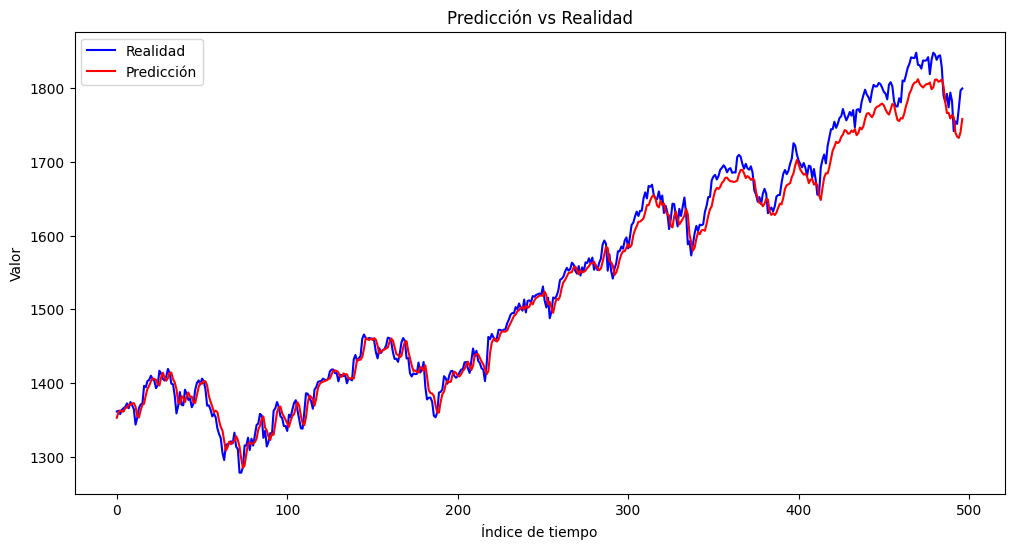

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Métricas del modelo:
Loss en entrenamiento (MSE): 397.35607672845396
MAE en entrenamiento: 14.722025288238923
Loss en validación (MSE): 413.93048429197955
MAE en validación: 14.126731900190201
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0099e-04 - mae: 0.0078 
Loss en prueba (MSE): 0.00016631804464850575
MAE en prueba: 0.010155728086829185


In [ ]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Desnormalizar las predicciones y los valores reales
y_pred_unscaled = scaler.inverse_transform(y_pred)
y_test_unscaled = scaler.inverse_transform(y_test)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label='Realidad', color='blue')
plt.plot(y_pred_unscaled, label='Predicción', color='red')
plt.title('Predicción vs Realidad')
plt.xlabel('Índice de tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

# Reporte de los resultados del modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Desnormalizar los datos para calcular las métricas
y_train_unscaled = scaler.inverse_transform(y_train)
y_val_unscaled = scaler.inverse_transform(y_val)

# Predecir sobre los conjuntos de entrenamiento y validación para calcular las métricas
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Desnormalizar las predicciones
y_train_pred_unscaled = scaler.inverse_transform(y_train_pred)
y_val_pred_unscaled = scaler.inverse_transform(y_val_pred)

# Calcular las métricas
train_mse = mean_squared_error(y_train_unscaled, y_train_pred_unscaled)
train_mae = mean_absolute_error(y_train_unscaled, y_train_pred_unscaled)
val_mse = mean_squared_error(y_val_unscaled, y_val_pred_unscaled)
val_mae = mean_absolute_error(y_val_unscaled, y_val_pred_unscaled)

print("Métricas del modelo:")
print(f"Loss en entrenamiento (MSE): {train_mse}")
print(f"MAE en entrenamiento: {train_mae}")
print(f"Loss en validación (MSE): {val_mse}")
print(f"MAE en validación: {val_mae}")

# Evaluar el modelo en el conjunto de prueba
loss, mae = model.evaluate(X_test, y_test)
print(f'Loss en prueba (MSE): {loss}')
print(f'MAE en prueba: {mae}')

Se evidencia que el modelo tiene un mejor comportamiento frente a las demas arquitecturas probadas en cada uno de los cunjuntos de datos y tanto para las metricas MSE y MAE. De igual manera, graficamente tambien se ve un mejor modelo.